# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
climatological_data = data[data['Disaster Subgroup'] == 'Climatological']

# count number of disasters in each year for each subgroup
climatological_disaster_counts = climatological_data['Year'].value_counts().sort_index()

# save index of years
climatological_disaster_counts_index = climatological_disaster_counts.index

# sum costs by year
climatological_costs = climatological_data[['Year', 'Total Damages']]
climatological_costs = climatological_costs.groupby('Year').sum()
climatological_costs = climatological_costs.squeeze()

# SPLIT CLIMATOLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in climatological_data['Disaster Type'].unique():
    print(dtype)

Drought
Wildfire


In [5]:
# create new dataframes for each type
drought_data = climatological_data[climatological_data['Disaster Type'] == 'Drought']
wildfire_data = climatological_data[climatological_data['Disaster Type'] == 'Wildfire']

# count number of disasters in each year for each subgroup
drought_disaster_counts = drought_data['Year'].value_counts().sort_index()
wildfire_disaster_counts = wildfire_data['Year'].value_counts()
wildfire_disaster_counts[1988] = 0
wildfire_disaster_counts = wildfire_disaster_counts.sort_index()
# save index of years
drought_disaster_counts_index = drought_disaster_counts.index
wildfire_disaster_counts_index = wildfire_disaster_counts.index

# PLOT CLIMATOLOGICAL DISASTERS

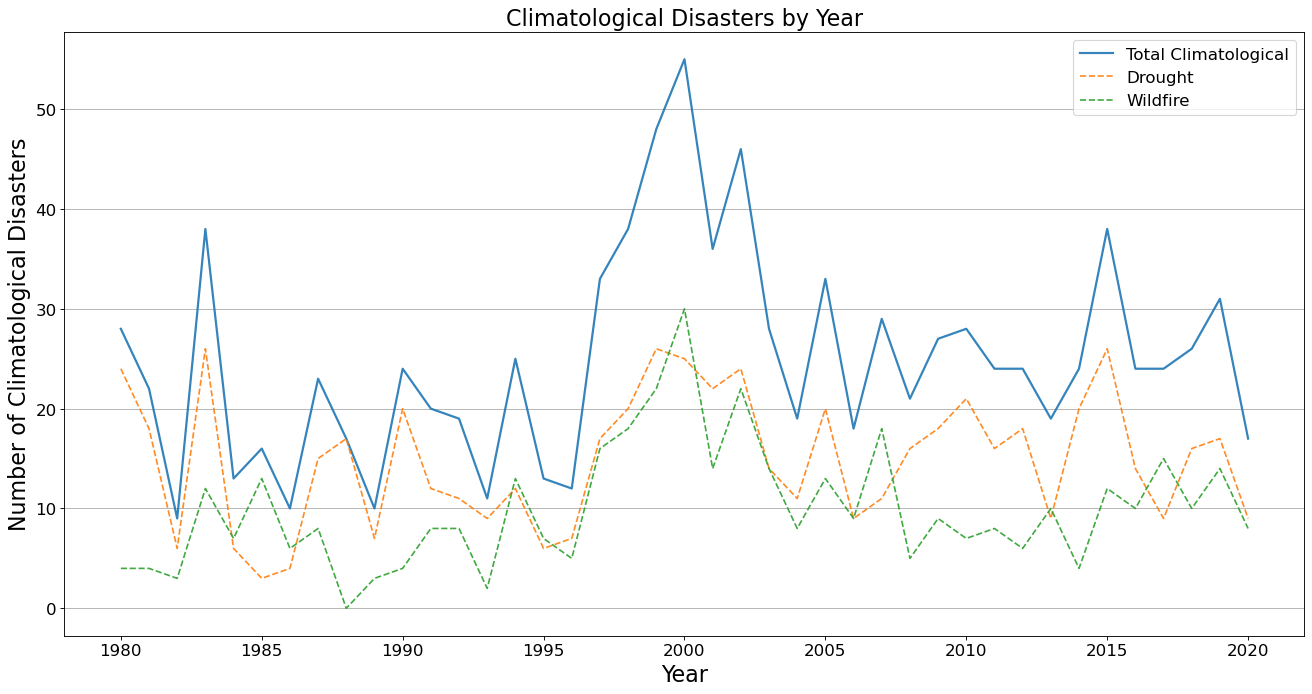

In [6]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Climatological Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Climatological Disasters")
plt.plot(climatological_disaster_counts_index,climatological_disaster_counts, linewidth=2, alpha = 0.9)
plt.plot(drought_disaster_counts_index, drought_disaster_counts, linestyle = '--', alpha = 0.9)
plt.plot(wildfire_disaster_counts_index, wildfire_disaster_counts, linestyle = '--', alpha = 0.9)

plt.legend(['Total Climatological', 'Drought', 'Wildfire'])

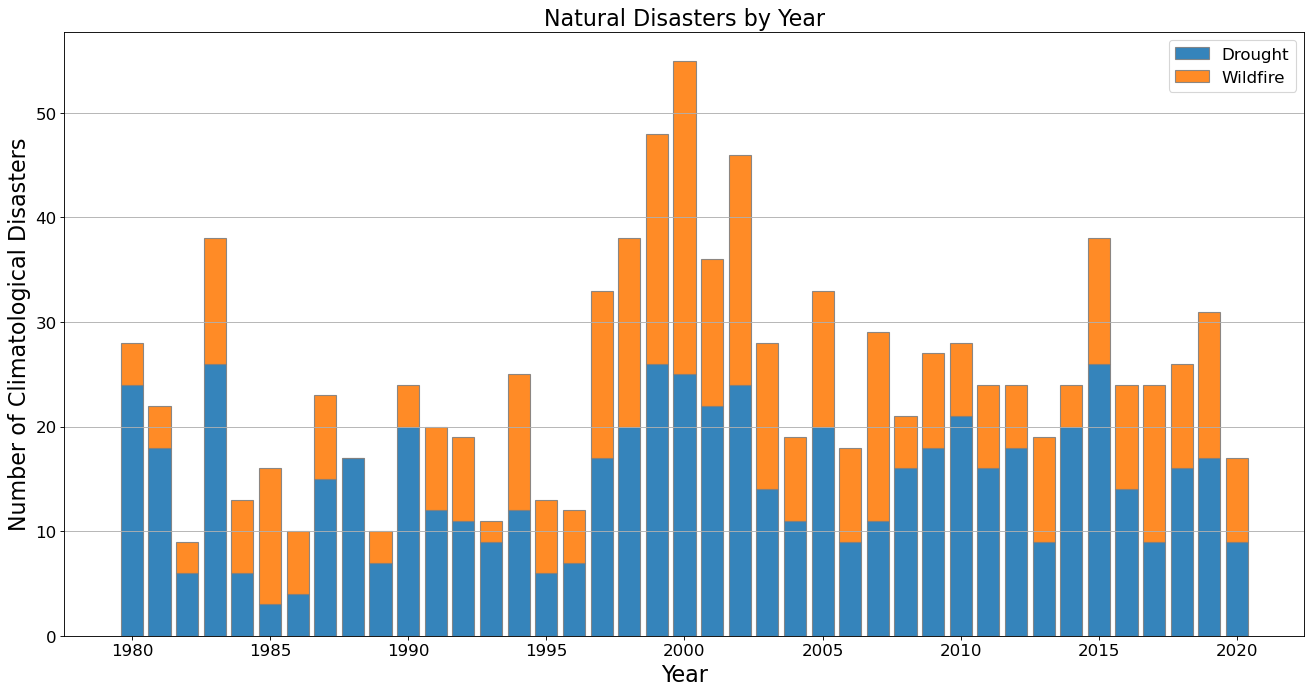

In [7]:
# bar chart

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Natural Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Climatological Disasters")

plt.bar(drought_disaster_counts_index, drought_disaster_counts, edgecolor = 'grey', alpha = 0.9)
plt.bar(wildfire_disaster_counts_index, wildfire_disaster_counts, bottom = drought_disaster_counts, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Drought', 'Wildfire'])

# BOXPLOT CLIMATOLOGICAL DISASTERS BY DECADE

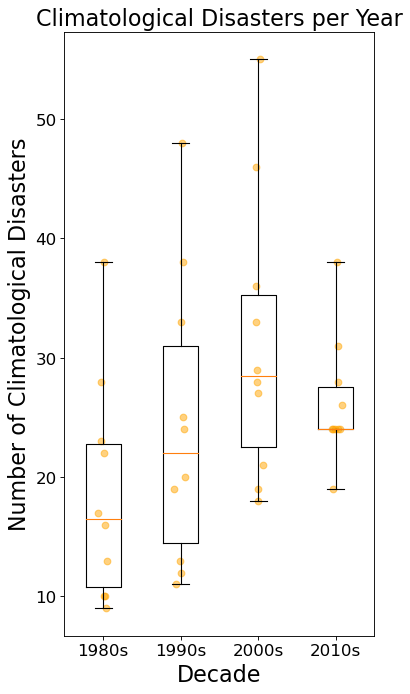

In [8]:
# BOXPLOT TOTAL CLIMATOLOGICAL DATA

total_box_data = [climatological_disaster_counts[0:10], climatological_disaster_counts[10:20], climatological_disaster_counts[20:30], climatological_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Climatological Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Climatological Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_data[3], color = 'orange', alpha = 0.5)

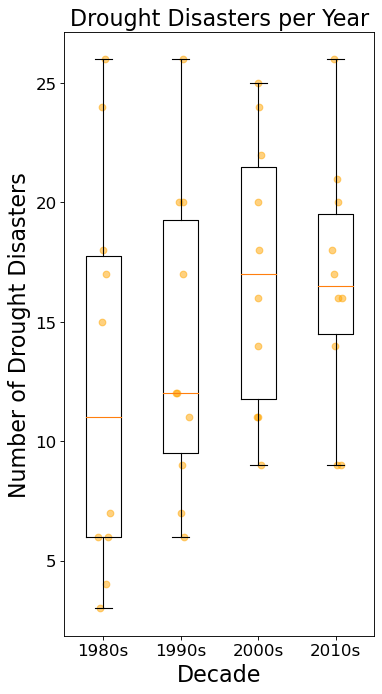

In [20]:
# BOXPLOT DROUGHT DATA

drought_box_data = [drought_disaster_counts[0:10], drought_disaster_counts[10:20], drought_disaster_counts[20:30], drought_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Drought Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Drought Disasters")

plt.boxplot(drought_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,drought_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,drought_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,drought_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,drought_box_data[3], color = 'orange', alpha = 0.5)

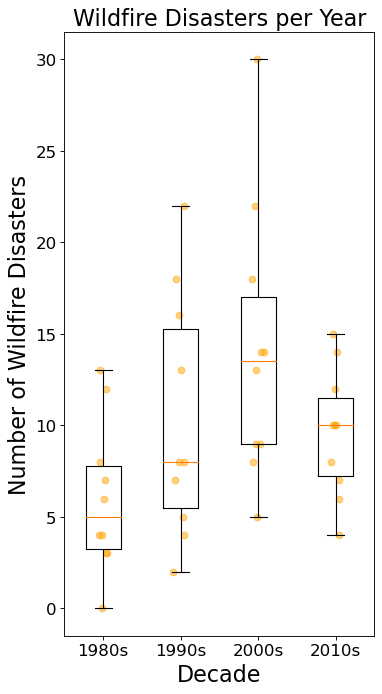

In [21]:
# BOXPLOT WILDFIRE DATA

wildfire_box_data = [wildfire_disaster_counts[0:10], wildfire_disaster_counts[10:20], wildfire_disaster_counts[20:30], wildfire_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Wildfire Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Wildfire Disasters")

plt.boxplot(wildfire_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,wildfire_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,wildfire_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,wildfire_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,wildfire_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE CLIMATOLOGICAL DISASTER OCCURANCES

In [25]:
# CLIMATOLOGICAL DISASTER ANALYSIS

print("CLIMATOLOGICAL DISASTER ANALYSIS")

# climatological statistical data
print("\nTotal Climatological Statistical Data: ")
print(climatological_disaster_counts.describe())

# 1980s climatological statistical data
print("\n1980s Climatological Statistical Data: ")
print(climatological_disaster_counts[0:10].describe())

# 1990s climatological statistical data
print("\n1990s Climatological Statistical Data: ")
print(climatological_disaster_counts[10:20].describe())

# 2000s climatological statistical data
print("\n2000s Climatological Statistical Data: ")
print(climatological_disaster_counts[20:30].describe())

# 2010s climatological statistical data
print("\n2010s Climatological Statistical Data: ")
print(climatological_disaster_counts[30:40].describe())

print("\n")

# climatological statistical changes 1980s-2010s
climatological_mean_1980s = climatological_disaster_counts[0:10].mean()
climatological_mean_2010s = climatological_disaster_counts[30:40].mean()
mean_percent_change_climatological_1980_to_2020 = 100*(climatological_mean_2010s-climatological_mean_1980s)/climatological_mean_1980s
print("Mean Climatological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_climatological_1980_to_2020))

climatological_max_1980s = climatological_disaster_counts[0:10].max()
climatological_max_2010s = climatological_disaster_counts[30:40].max()
max_percent_change_climatological_1980_to_2020 = 100*(climatological_max_2010s-climatological_max_1980s)/climatological_max_1980s
print("Max Climatological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_climatological_1980_to_2020))

climatological_min_1980s = climatological_disaster_counts[0:10].min()
climatological_min_2010s = climatological_disaster_counts[30:40].min()
min_percent_change_climatological_1980_to_2020 = 100*(climatological_min_2010s-climatological_min_1980s)/climatological_min_1980s
print("Min Climatological Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_climatological_1980_to_2020))

climatological_std_1980s = climatological_disaster_counts[0:10].std()
climatological_std_2010s = climatological_disaster_counts[30:40].std()
std_percent_change_climatological_1980_to_2020 = 100*(climatological_std_2010s-climatological_std_1980s)/climatological_std_1980s
print("Standard Deviation of Climatological Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_climatological_1980_to_2020))

CLIMATOLOGICAL DISASTER ANALYSIS

Total Climatological Statistical Data: 
count    41.000000
mean     24.878049
std      10.599988
min       9.000000
25%      18.000000
50%      24.000000
75%      29.000000
max      55.000000
Name: Year, dtype: float64

1980s Climatological Statistical Data: 
count    10.000000
mean     18.600000
std       9.287985
min       9.000000
25%      10.750000
50%      16.500000
75%      22.750000
max      38.000000
Name: Year, dtype: float64

1990s Climatological Statistical Data: 
count    10.000000
mean     24.300000
std      12.147702
min      11.000000
25%      14.500000
50%      22.000000
75%      31.000000
max      48.000000
Name: Year, dtype: float64

2000s Climatological Statistical Data: 
count    10.0000
mean     31.2000
std      11.8865
min      18.0000
25%      22.5000
50%      28.5000
75%      35.2500
max      55.0000
Name: Year, dtype: float64

2010s Climatological Statistical Data: 
count    10.000000
mean     26.200000
std       5.181162
min  

In [26]:
# DROUGHT DISASTER ANALYSIS

print("DROUGHT DISASTER ANALYSIS")

# drought statistical data
print("\nTotal Drought Statistical Data: ")
print(drought_disaster_counts.describe())

# 1980s drought statistical data
print("\n1980s Drought Statistical Data: ")
print(drought_disaster_counts[0:10].describe())

# 1990s drought statistical data
print("\n1990s Drought Statistical Data: ")
print(drought_disaster_counts[10:20].describe())

# 2000s drought statistical data
print("\n2000s Drought Statistical Data: ")
print(drought_disaster_counts[20:30].describe())

# 2010s drought statistical data
print("\n2010s Drought Statistical Data: ")
print(drought_disaster_counts[30:40].describe())

print("\n")

# drought statistical changes 1980s-2010s
drought_mean_1980s = drought_disaster_counts[0:10].mean()
drought_mean_2010s = drought_disaster_counts[30:40].mean()
mean_percent_change_drought_1980_to_2020 = 100*(drought_mean_2010s-drought_mean_1980s)/drought_mean_1980s
print("Mean Drought Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_drought_1980_to_2020))

drought_max_1980s = drought_disaster_counts[0:10].max()
drought_max_2010s = drought_disaster_counts[30:40].max()
max_percent_change_drought_1980_to_2020 = 100*(climatological_max_2010s-climatological_max_1980s)/climatological_max_1980s
print("Max Drought Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_climatological_1980_to_2020))

drought_min_1980s = drought_disaster_counts[0:10].min()
drought_min_2010s = drought_disaster_counts[30:40].min()
min_percent_change_drought_1980_to_2020 = 100*(climatological_min_2010s-climatological_min_1980s)/climatological_min_1980s
print("Min Drought Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_climatological_1980_to_2020))

drought_std_1980s = drought_disaster_counts[0:10].std()
drought_std_2010s = drought_disaster_counts[30:40].std()
std_percent_change_drought_1980_to_2020 = 100*(drought_std_2010s-drought_std_1980s)/drought_std_1980s
print("Standard Deviation of Drought Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_drought_1980_to_2020))

DROUGHT DISASTER ANALYSIS

Total Drought Statistical Data: 
count    41.000000
mean     14.902439
std       6.587127
min       3.000000
25%       9.000000
50%      16.000000
75%      20.000000
max      26.000000
Name: Year, dtype: float64

1980s Drought Statistical Data: 
count    10.0000
mean     12.6000
std       8.4879
min       3.0000
25%       6.0000
50%      11.0000
75%      17.7500
max      26.0000
Name: Year, dtype: float64

1990s Drought Statistical Data: 
count    10.000000
mean     14.000000
std       6.497863
min       6.000000
25%       9.500000
50%      12.000000
75%      19.250000
max      26.000000
Name: Year, dtype: float64

2000s Drought Statistical Data: 
count    10.000000
mean     17.000000
std       5.715476
min       9.000000
25%      11.750000
50%      17.000000
75%      21.500000
max      25.000000
Name: Year, dtype: float64

2010s Drought Statistical Data: 
count    10.000000
mean     16.600000
std       5.211099
min       9.000000
25%      14.500000
50%      

In [27]:
# WILDFIRE DISASTER ANALYSIS

print("WILDFIRE DISASTER ANALYSIS")

# wildfire statistical data
print("\nTotal Wildfire Statistical Data: ")
print(wildfire_disaster_counts.describe())

# 1980s wildfire statistical data
print("\n1980s Wildfire Statistical Data: ")
print(wildfire_disaster_counts[0:10].describe())

# 1990s wildfire statistical data
print("\n1990s Wildfire Statistical Data: ")
print(wildfire_disaster_counts[10:20].describe())

# 2000s wildfire statistical data
print("\n2000s Wildfire Statistical Data: ")
print(wildfire_disaster_counts[20:30].describe())

# 2010s wildfire statistical data
print("\n2010s Wildfire Statistical Data: ")
print(wildfire_disaster_counts[30:40].describe())

print("\n")

# wildfire statistical changes 1980s-2010s
wildfire_mean_1980s = wildfire_disaster_counts[0:10].mean()
wildfire_mean_2010s = wildfire_disaster_counts[30:40].mean()
mean_percent_change_wildfire_1980_to_2020 = 100*(wildfire_mean_2010s-wildfire_mean_1980s)/wildfire_mean_1980s
print("Mean Wildfire Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_wildfire_1980_to_2020))

wildfire_max_1980s = wildfire_disaster_counts[0:10].max()
wildfire_max_2010s = wildfire_disaster_counts[30:40].max()
max_percent_change_wildfire_1980_to_2020 = 100*(wildfire_max_2010s-wildfire_max_1980s)/wildfire_max_1980s
print("Max Wildfire Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_wildfire_1980_to_2020))

wildfire_min_1980s = wildfire_disaster_counts[0:10].min()
wildfire_min_2010s = wildfire_disaster_counts[30:40].min()
min_percent_change_wildfire_1980_to_2020 = 100*(wildfire_min_2010s-wildfire_min_1980s)/wildfire_min_1980s
print("Min Wildfire Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_wildfire_1980_to_2020))

wildfire_std_1980s = wildfire_disaster_counts[0:10].std()
wildfire_std_2010s = wildfire_disaster_counts[30:40].std()
std_percent_change_wildfire_1980_to_2020 = 100*(wildfire_std_2010s-wildfire_std_1980s)/wildfire_std_1980s
print("Standard Deviation of Wildfire Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_wildfire_1980_to_2020))

WILDFIRE DISASTER ANALYSIS

Total Wildfire Statistical Data: 
count    41.000000
mean      9.975610
std       6.125715
min       0.000000
25%       6.000000
50%       8.000000
75%      13.000000
max      30.000000
Name: Year, dtype: float64

1980s Wildfire Statistical Data: 
count    10.000000
mean      6.000000
std       4.109609
min       0.000000
25%       3.250000
50%       5.000000
75%       7.750000
max      13.000000
Name: Year, dtype: float64

1990s Wildfire Statistical Data: 
count    10.000000
mean     10.300000
std       6.617317
min       2.000000
25%       5.500000
50%       8.000000
75%      15.250000
max      22.000000
Name: Year, dtype: float64

2000s Wildfire Statistical Data: 
count    10.000000
mean     14.200000
std       7.480345
min       5.000000
25%       9.000000
50%      13.500000
75%      17.000000
max      30.000000
Name: Year, dtype: float64

2010s Wildfire Statistical Data: 
count    10.000000
mean      9.600000
std       3.470511
min       4.000000
25%   

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in longlong_scalars


# CLIMATOLOGICAL DISASTER COSTS

In [10]:
drought_costs = drought_data[['Year', 'Total Damages']]
drought_costs = drought_costs.groupby('Year').sum()
drought_costs = drought_costs.squeeze()

wildfire_costs = wildfire_data[['Year', 'Total Damages']]
wildfire_costs = wildfire_costs.groupby('Year').sum()
wildfire_costs = wildfire_costs.squeeze()
wildfire_costs[1988] = 0
wildfire_costs = wildfire_costs.sort_index()

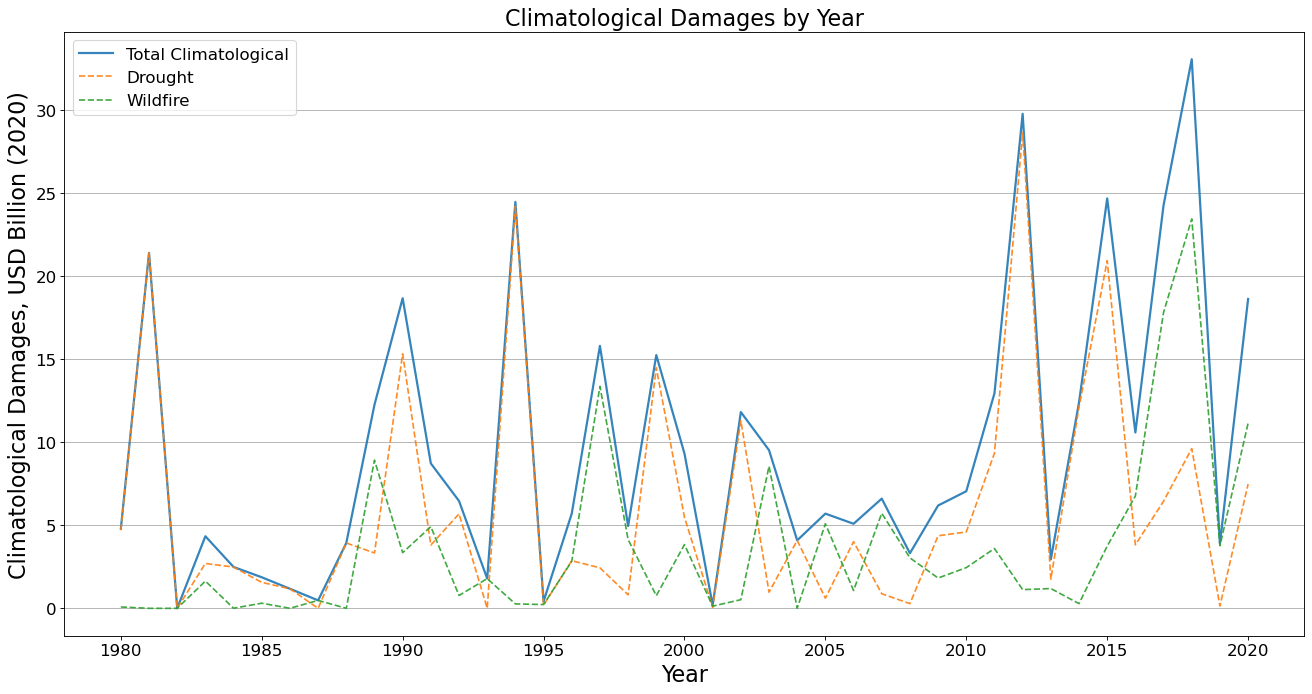

In [11]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Climatological Damages by Year")
plt.xlabel("Year")
plt.ylabel("Climatological Damages, USD Billion (2020)")
plt.plot(climatological_costs.index, climatological_costs, linewidth=2, alpha = 0.9)
plt.plot(drought_costs.index, drought_costs, linestyle = '--', alpha = 0.9)
plt.plot(wildfire_costs.index, wildfire_costs, linestyle = '--', alpha = 0.9)

plt.legend(['Total Climatological', 'Drought', 'Wildfire'])

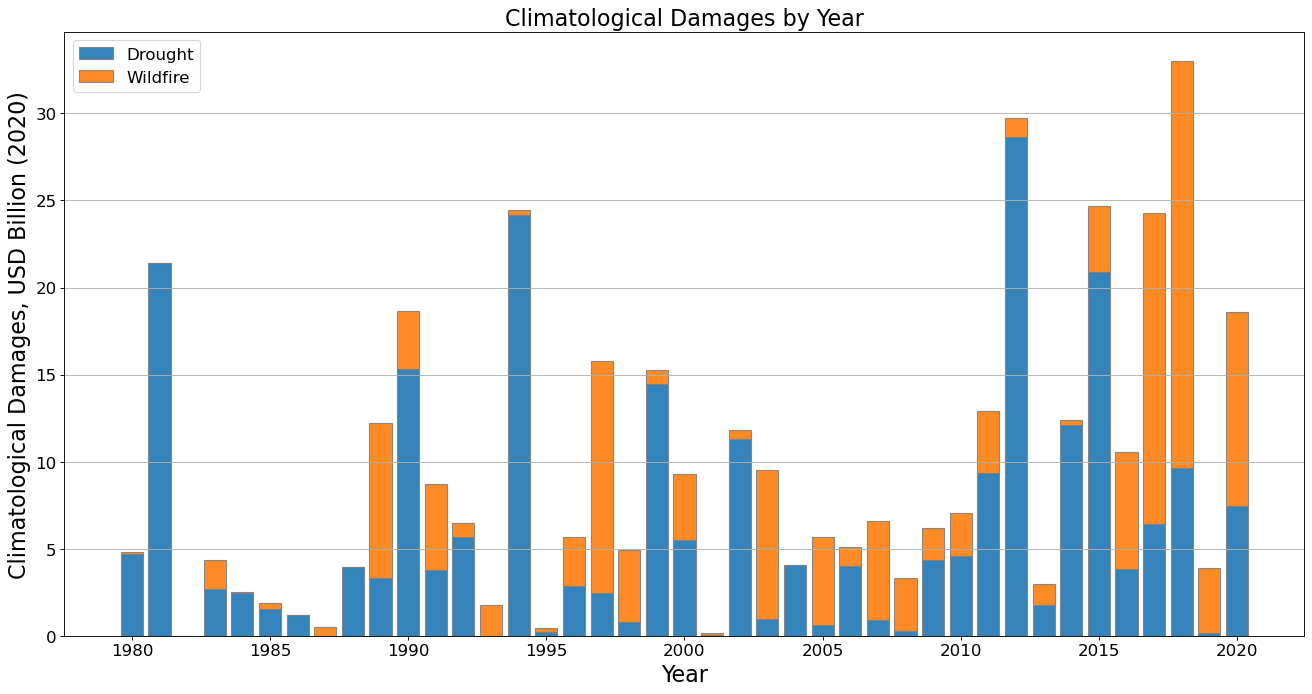

In [12]:
# bar chart

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Climatological Damages by Year")
plt.xlabel("Year")
plt.ylabel("Climatological Damages, USD Billion (2020)")

plt.bar(drought_costs.index, drought_costs, edgecolor = 'grey', alpha = 0.9)
plt.bar(wildfire_costs.index, wildfire_costs, bottom = drought_costs, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Drought', 'Wildfire'])

# BOXPLOT CLIMATOLOGICAL DAMAGES BY DECADE

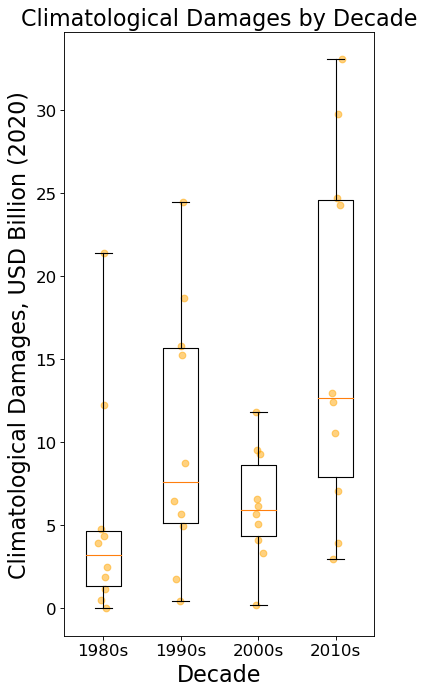

In [13]:
# BOXPLOT TOTAL CLIMATOLOGICAL COST DATA

climatological_box_data = [climatological_costs[0:10], climatological_costs[10:20], climatological_costs[20:30], climatological_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Climatological Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Climatological Damages, USD Billion (2020)")

plt.boxplot(climatological_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,climatological_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,climatological_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,climatological_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,climatological_box_data[3], color = 'orange', alpha = 0.5)

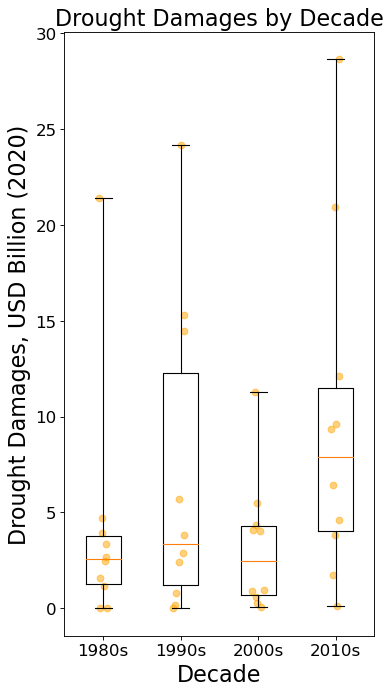

In [23]:
# BOXPLOT DROUGHT COST DATA

drought_box_data = [drought_costs[0:10], drought_costs[10:20], drought_costs[20:30], drought_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Drought Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Drought Damages, USD Billion (2020)")

plt.boxplot(drought_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,drought_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,drought_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,drought_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,drought_box_data[3], color = 'orange', alpha = 0.5)

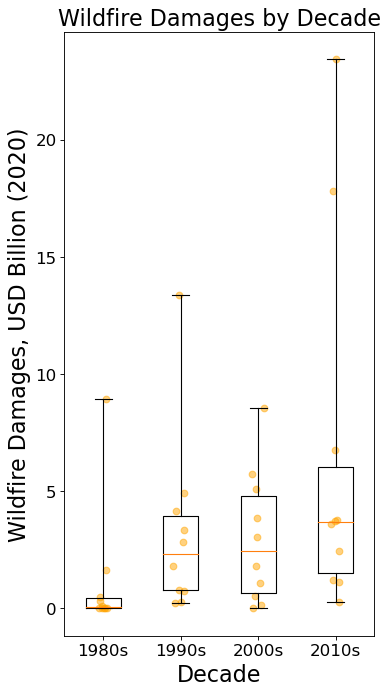

In [24]:
# BOXPLOT wildfire COST DATA

wildfire_box_data = [wildfire_costs[0:10], wildfire_costs[10:20], wildfire_costs[20:30], wildfire_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Wildfire Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Wildfire Damages, USD Billion (2020)")

plt.boxplot(wildfire_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,wildfire_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,wildfire_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,wildfire_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,wildfire_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE DISASTER COSTS

In [28]:
# CLIMATOLOGICAL DISASTER COST ANALYSIS

print("CLIMATOLOGICAL DISASTER COST ANALYSIS")

# climatological costs statistical data
print("\nTotal Climatological Costs Statistical Data: ")
print(climatological_costs.describe())

# 1980s climatological costs statistical data
print("\n1980s Climatological Costs Statistical Data: ")
print(climatological_costs[0:10].describe())

# 1990s climatological costs statistical data
print("\n1990s Climatological Costs Statistical Data: ")
print(climatological_costs[10:20].describe())

# 2000s climatological costs statistical data
print("\n2000s Climatological Costs Statistical Data: ")
print(climatological_costs[20:30].describe())

# 2010s climatological costs statistical data
print("\n2010s Climatological Costs Statistical Data: ")
print(climatological_costs[30:40].describe())

print("\n")

# climatological costs statistical changes 1980s-2010s
climatological_mean_costs_1980s = climatological_costs[0:10].mean()
climatological_mean_costs_2010s = climatological_costs[30:40].mean()
mean_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_mean_costs_2010s-climatological_mean_costs_1980s)/climatological_mean_costs_1980s
print("Mean Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_climatological_1980_to_2020))

climatological_max_costs_1980s = climatological_costs[0:10].max()
climatological_max_costs_2010s = climatological_costs[30:40].max()
max_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_max_costs_2010s-climatological_max_costs_1980s)/climatological_max_costs_1980s
print("Max Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_climatological_1980_to_2020))

climatological_min_costs_1980s = climatological_costs[0:10].min()
climatological_min_costs_2010s = climatological_costs[30:40].min()
min_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_min_costs_2010s-climatological_min_costs_1980s)/climatological_min_costs_1980s
print("Min Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_climatological_1980_to_2020))

climatological_std_costs_1980s = climatological_costs[0:10].std()
climatological_std_costs_2010s = climatological_costs[30:40].std()
std_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_std_costs_2010s-climatological_std_costs_1980s)/climatological_std_costs_1980s
print("Standard Deviation of Climatological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_climatological_1980_to_2020))

CLIMATOLOGICAL DISASTER COST ANALYSIS

Total Climatological Costs Statistical Data: 
count    41.000000
mean      9.677076
std       8.590469
min       0.000000
25%       3.901167
50%       6.459137
75%      12.936397
max      33.035825
Name: Total Damages, dtype: float64

1980s Climatological Costs Statistical Data: 
count    10.000000
mean      5.268973
std       6.650199
min       0.000000
25%       1.349829
50%       3.209343
75%       4.671573
max      21.384256
Name: Total Damages, dtype: float64

1990s Climatological Costs Statistical Data: 
count    10.000000
mean     10.216700
std       7.899228
min       0.418676
25%       5.138738
50%       7.588558
75%      15.651043
max      24.449320
Name: Total Damages, dtype: float64

2000s Climatological Costs Statistical Data: 
count    10.000000
mean      6.179280
std       3.378803
min       0.184159
25%       4.339011
50%       5.941260
75%       8.632401
max      11.808952
Name: Total Damages, dtype: float64

2010s Climatological 

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


In [29]:
# DROUGHT DISASTER COST ANALYSIS

print("DROUGHT DISASTER COST ANALYSIS")

# drought costs statistical data
print("\nTotal Drought Costs Statistical Data: ")
print(drought_costs.describe())

# 1980s drought costs statistical data
print("\n1980s Drought Costs Statistical Data: ")
print(drought_costs[0:10].describe())

# 1990s drought costs statistical data
print("\n1990s Drought Costs Statistical Data: ")
print(drought_costs[10:20].describe())

# 2000s drought costs statistical data
print("\n2000s Drought Costs Statistical Data: ")
print(drought_costs[20:30].describe())

# 2010s drought costs statistical data
print("\n2010s Drought Costs Statistical Data: ")
print(drought_costs[30:40].describe())

print("\n")

# drought costs statistical changes 1980s-2010s
drought_mean_costs_1980s = drought_costs[0:10].mean()
drought_mean_costs_2010s = drought_costs[30:40].mean()
mean_costs_percent_change_drought_1980_to_2020 = 100*(drought_mean_costs_2010s-drought_mean_costs_1980s)/drought_mean_costs_1980s
print("Mean Drought Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_drought_1980_to_2020))

drought_max_costs_1980s = drought_costs[0:10].max()
drought_max_costs_2010s = drought_costs[30:40].max()
max_costs_percent_change_drought_1980_to_2020 = 100*(drought_max_costs_2010s-drought_max_costs_1980s)/drought_max_costs_1980s
print("Max Drought Disaster Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_drought_1980_to_2020))

drought_min_costs_1980s = drought_costs[0:10].min()
drought_min_costs_2010s = drought_costs[30:40].min()
min_costs_percent_change_drought_1980_to_2020 = 100*(drought_min_costs_2010s-drought_min_costs_1980s)/drought_min_costs_1980s
print("Min Drought Disaster Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_drought_1980_to_2020))

drought_std_costs_1980s = drought_costs[0:10].std()
drought_std_costs_2010s = drought_costs[30:40].std()
std_costs_percent_change_drought_1980_to_2020 = 100*(drought_std_costs_2010s-drought_std_costs_1980s)/drought_std_costs_1980s
print("Standard Deviation of Drought Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_drought_1980_to_2020))

DROUGHT DISASTER COST ANALYSIS

Total Drought Costs Statistical Data: 
count    41.000000
mean      6.045993
std       7.151921
min       0.000000
25%       0.969036
50%       3.820190
75%       7.475883
max      28.631512
Name: Total Damages, dtype: float64

1980s Drought Costs Statistical Data: 
count    10.000000
mean      4.126815
std       6.261921
min       0.000000
25%       1.272975
50%       2.591700
75%       3.780121
max      21.384256
Name: Total Damages, dtype: float64

1990s Drought Costs Statistical Data: 
count    10.000000
mean      6.976877
std       8.190247
min       0.003572
25%       1.217896
50%       3.335795
75%      12.278546
max      24.184762
Name: Total Damages, dtype: float64

2000s Drought Costs Statistical Data: 
count    10.000000
mean      3.201961
std       3.478849
min       0.053033
25%       0.677530
50%       2.490917
75%       4.294161
max      11.289612
Name: Total Damages, dtype: float64

2010s Drought Costs Statistical Data: 
count    10.00000

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


In [30]:
# WILDFIRE DISASTER COST ANALYSIS

print("WILDFIRE DISASTER COST ANALYSIS")

# wildfire costs statistical data
print("\nTotal Wildfire Costs Statistical Data: ")
print(wildfire_costs.describe())

# 1980s wildfire costs statistical data
print("\n1980s Wildfire Costs Statistical Data: ")
print(wildfire_costs[0:10].describe())

# 1990s wildfire costs statistical data
print("\n1990s Wildfire Costs Statistical Data: ")
print(wildfire_costs[10:20].describe())

# 2000s wildfire costs statistical data
print("\n2000s Wildfire Costs Statistical Data: ")
print(wildfire_costs[20:30].describe())

# 2010s wildfire costs statistical data
print("\n2010s Wildfire Costs Statistical Data: ")
print(wildfire_costs[30:40].describe())

print("\n")

# wildfire costs statistical changes 1980s-2010s
wildfire_mean_costs_1980s = wildfire_costs[0:10].mean()
wildfire_mean_costs_2010s = wildfire_costs[30:40].mean()
mean_costs_percent_change_wildfire_1980_to_2020 = 100*(wildfire_mean_costs_2010s-wildfire_mean_costs_1980s)/wildfire_mean_costs_1980s
print("Mean Wildfire Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_wildfire_1980_to_2020))

wildfire_max_costs_1980s = wildfire_costs[0:10].max()
wildfire_max_costs_2010s = wildfire_costs[30:40].max()
max_costs_percent_change_wildfire_1980_to_2020 = 100*(wildfire_max_costs_2010s-wildfire_max_costs_1980s)/wildfire_max_costs_1980s
print("Max Wildfire Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_wildfire_1980_to_2020))

wildfire_min_costs_1980s = wildfire_costs[0:10].min()
wildfire_min_costs_2010s = wildfire_costs[30:40].min()
min_costs_percent_change_wildfire_1980_to_2020 = 100*(wildfire_min_costs_2010s-wildfire_min_costs_1980s)/wildfire_min_costs_1980s
print("Min Wildfire Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_wildfire_1980_to_2020))

wildfire_std_costs_1980s = wildfire_costs[0:10].std()
wildfire_std_costs_2010s = wildfire_costs[30:40].std()
std_costs_percent_change_wildfire_1980_to_2020 = 100*(wildfire_std_costs_2010s-wildfire_std_costs_1980s)/wildfire_std_costs_1980s
print("Standard Deviation of Wildfire Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_wildfire_1980_to_2020))

WILDFIRE DISASTER COST ANALYSIS

Total Wildfire Costs Statistical Data: 
count    41.000000
mean      3.631082
std       5.077129
min       0.000000
25%       0.282243
50%       1.785867
75%       4.140412
max      23.426130
Name: Total Damages, dtype: float64

1980s Wildfire Costs Statistical Data: 
count    10.000000
mean      1.142158
std       2.777531
min       0.000000
25%       0.000000
50%       0.043178
75%       0.434495
max       8.914672
Name: Total Damages, dtype: float64

1990s Wildfire Costs Statistical Data: 
count    10.000000
mean      3.239823
std       3.920823
min       0.227707
25%       0.763526
50%       2.308544
75%       3.942204
max      13.354248
Name: Total Damages, dtype: float64

2000s Wildfire Costs Statistical Data: 
count    10.000000
mean      2.977319
std       2.822128
min       0.004098
25%       0.657935
50%       2.428175
75%       4.773340
max       8.547429
Name: Total Damages, dtype: float64

2010s Wildfire Costs Statistical Data: 
count    10

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars
